# Mathematik für Biologiestudierende

Wintersemester 2025/26

21.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* Konfidenzintervalle
* Empirische Covarianz
* Lineare Regression für Datenpaare

In [4]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Konfidenzintervalle

# Konfidenzintervall für den Erwartungswert

* $X_1, \dots, X_n$ seien normalverteilt mit unbekanntem Erwartungswert und unbekannter Streuung
* alle haben denselben Erwartungswert und dieselbe Streuung
* Für den Erwartungswert soll ein Konfidenzintervall zum Konfidenzniveau $1-\alpha$ geschätzt werden

* Das Konfidenzintervall ist
$$   \left[ \overline x - \frac{s \cdot t_{n-1, 1-\alpha/2}}{\sqrt n},\,
        \overline x + \frac{s \cdot t_{n-1, 1-\alpha/2}}{\sqrt n} \right]  $$

### Bedeutung des Konfidenzintervalls

* Das Konfidenzintervalls zum Konfidenzniveau $1-\alpha$ ist ein Intervall, in welchem der wahre Erwartungswert $\mu$ mit Wahrscheinlichkeit $1-\alpha$ liegt
* Die beiden Grenzen des Konfidenzintervalls bezeichnet man als obere und untere *Vertrauensgrenze*
* Das Konfidenzintervall ist die zufallsbehaftete Größe, nicht der Erwartungswert

### Beispiel: Roggenpflanzen

* Gesunde Roggenpflanzen einer bestimmten Art sind im Mittel $102.5cm$ lang.  Die Länge sei normalverteilt
* Durch Umwelteinflüsse änderte sich möglicherweise die mittlere Halmlänge.  Das soll zum Konfidenzniveau 95% überprüft werden
* Die folgenden Längen werden gemessen

In [5]:
df = pd.DataFrame()
df['Länge'] = [96.62, 94.91, 85.05, 101.61, 109.55, 93.05, 97.86, 96.66, 95.08, 98.87]
df

,Länge
0,96.62
1,94.91
2,85.05
3,101.61
4,109.55
5,93.05
6,97.86
7,96.66
8,95.08
9,98.87


In [6]:
df.describe()

,Länge
count,10.000000
mean,96.926000
std,6.233029
min,85.050000
25%,94.952500
50%,96.640000
75%,98.617500
max,109.550000


* $1 - \alpha = 0.95$, also $\alpha = 0.05$ und $1 - \frac\alpha2 = 0.975$
* Es wird das Quantil $t_{9,0.975}$ benötigt

In [7]:
P = stats.t(9)
P.ppf(0.975)

2.2621571628540993

In [8]:
ugrenze = 96.926 - 6.233*P.ppf(0.975) / np.sqrt(10)
ugrenze

92.46718040497468

In [9]:
ogrenze = 96.926 + 6.233*P.ppf(0.975) / np.sqrt(10)
ogrenze

101.38481959502532

* Der Erwartungswert für gesunde Pflanzen beträgt 102.5$cm$.  Da er nicht in dem Konfidenzintervall zum Konfidenzniveau 95% liegt, kann man zum Signifikanzniveau 5% sagen, dass die Roggenpflanzen geschädigt sind
* Kennt man also das Konfidenzintervall zum Konfidenzniveau $1-\alpha$, so kann man den *zweiseitigen* t-Test zum Signifikanzniveau $\alpha$ durchführen

* dasselbe mit `statsmodels`

In [10]:
import statsmodels.stats.api as sms

sms.DescrStatsW(df.Länge).tconfint_mean()

(92.46715975292865, 101.38484024707135)

### Plot des Konfidenzintervalls

<img src="bilder/roggen2.svg" alt="Konfidenzintervall" width="65%"/>

Der gelbe Bereich ist das Konfidenzintervall zum Konfidenzniveau 95%

# Datenpaare

In [11]:
df = pd.read_csv('blutdruckdaten.csv')
df.head()

,Alter,Blutdruck,Größe
0,17,110.0,165.3
1,19,125.0,180.0
2,21,118.0,177.8
3,23,119.0,173.3
4,25,125.0,173.5


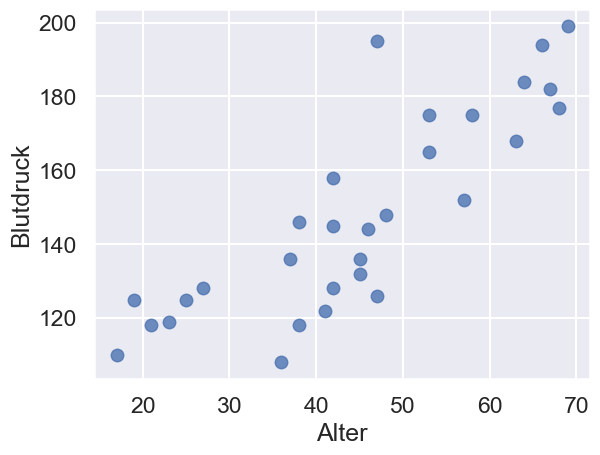

In [12]:
sns.regplot(df, x='Alter', y='Blutdruck', fit_reg=False);

Wir wollen die "beste" Gerade durch diese Punkte

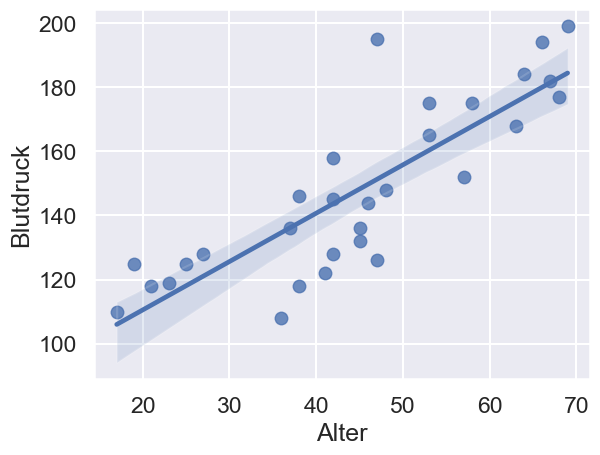

In [13]:
sns.regplot(df, x='Alter', y='Blutdruck');

Die Bedeutung des hellblauen Bereichs verstehen wir nach der Erläuterung der Geraden

# Empirische Kovarianz

* Empirische Kovarianz: Wie empirische Varianz, aber für Datenpaare
* Wir haben $n$ Datenpaare $(x_1, y_1), (x_2, y_2), \dots, (x_n,y_n)$
* das arithmetische Mittel der $x_j$ ist $\overline x$, das der $y_j$ ist $\overline y$
* die *empirische Kovarianz* von $x$ und $y$ ist
$$ \text{covar}_{\text{emp}}(x,y) 
      = \frac1{n-1} \bigl( (x_1-\overline x)(y_1-\overline y) + (x_2-\overline
        x)(y_2-\overline y) + \dots + (x_n-\overline x)(y_n-\overline y)\bigr) $$

* Formel ohne Pünktchen
$$   \text{covar}_{\text{emp}}(x,y) = \frac1{n-1} \sum_{j=1}^n (x_j - \overline x)(y_j - \overline y) $$
* Die Kovarianz misst, wie $x$ und $y$ zusammenhängen

In [14]:
df.cov()

,Alter,Blutdruck,Größe
Alter,231.131034,348.572414,36.128966
Blutdruck,348.572414,750.271264,69.805057
Größe,36.128966,69.805057,28.617195


* Die Tabelle zeigt für jedes Faktorpaar die zugehörige Kovarianz
* Sie ist symmetrisch
* Auf der Diagonalen stehen die empirischen Varianzen

# Lineare Regression

* "Lineare Regression":  Bestimmung einer Regressionsgeraden 
* "linear": auf einer Gerade liegend
* "Gerade": Funktionsvorschrift
$$      y = m \cdot x + b  $$
* Hierbei ist 
  * $m$ die Steigung der Geraden
  * $b$ der Ordinatenabschnitt der Geraden

* Die Regressionsgerade ist die Gerade mit der bestmöglichen Annäherung an die Datenpunkte 
* "bestmöglich" bedeutet
$$ \sum_{j=1}^n (m \cdot x_j + b - y_j)^2 \overset{!}{=} \min $$

## Formel für die lineare Regression

* Gegeben: Datenpaare $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$
* Gesucht: Regressionsgerade $y = m \cdot x + b$
* Rechenvorschrift:  
    \begin{align*}
      m &= \frac{\text{covar}_\text{emp}(x,y)}{s_x^2} \\
      b &= \overline y - m \overline x
    \end{align*}
* Dabei:
  * $\overline x$ und $\overline y$: arithmetisches Mittel von $x$ und $y$
  * $s_x^2$ empirische Varianz von $x$ 
  * $\text{covar}_\text{emp}(x,y)$ empirische Kovarianz von $x$ und $y$

### Beispiel Blutdruck

In [15]:
cov = 348.57
var_x = 231.13
m = cov / var_x
m

1.5081123177432614

In [16]:
df.describe()

,Alter,Blutdruck,Größe
count,30.000000,30.000000,30.000000
mean,44.800000,147.933333,176.373333
std,15.202994,27.391080,5.349504
min,17.000000,108.000000,165.300000
25%,37.250000,125.250000,173.350000
50%,45.000000,144.500000,176.650000
75%,56.000000,173.250000,179.075000
max,69.000000,199.000000,189.000000


In [17]:
xq = 44.8

In [18]:
yq = 147.93

In [19]:
b = yq - m*xq
b

80.3665681651019

# Blutdruckdaten: Interpretation

* Pro Jahr steigt der Blutdruck um 1.5$mm$Hg 
* $b$ hat hier keine eigenständige Bedeutung, denn nahe $x=0$ wurden keine Daten erhoben
* Bei einem 50jährigen erwartet man einen Blutdruck von
  $$ 1.51 \cdot 50 + 80.4 = 155.9 $$
* Das ist absolut ungesund!

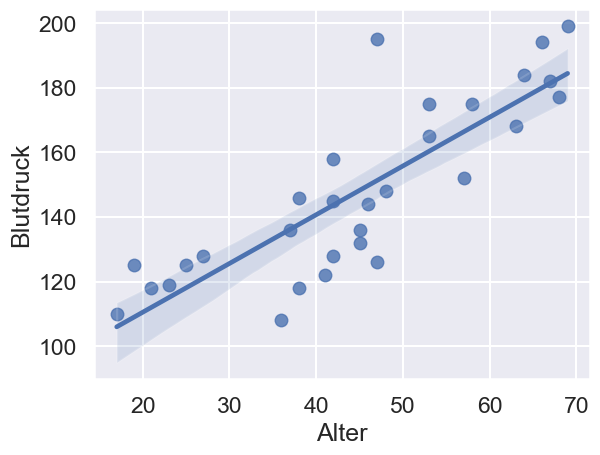

In [20]:
sns.regplot(df, x='Alter', y='Blutdruck');

## Bedeutung des hellblauen Bereichs

* `seaborn` berechnet ein Konfidenzintervall für $m$ und eins für $b$
* und daraus ein Konfidenzintervall für die erwarteten Werte für jedes Alter
* an den Rändern wird die Schätzung ungenauer, daher geht der Konfidenzbereich zu den Rändern hin etwas auseinander

* dasselbe für ein kleineres $\alpha$
* Achtung:  der Parameter `ci` wird in % angegeben

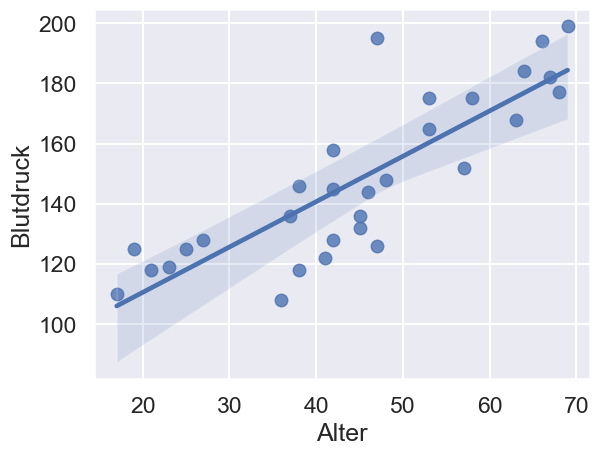

In [21]:
sns.regplot(df, x='Alter', y='Blutdruck', ci=99.9);

* `seaborn` bestimmt das Konfidenzintervall mit einer nichtparametrischen Methode

### Beispiel für zwei unkorrelierte Größen

* formal ist es auch möglich, Regressionsplot für zwei unkorrelierte Größen auszurechnen

* man glaubt, einen Zusammenhang zu sehen
* das ist ein Irrtum
* die Größe habe ich als normalverteilte Zufallsdaten an den Datensatz angefügt

In [32]:
df['Zufall'] = stats.norm().rvs(size=30)

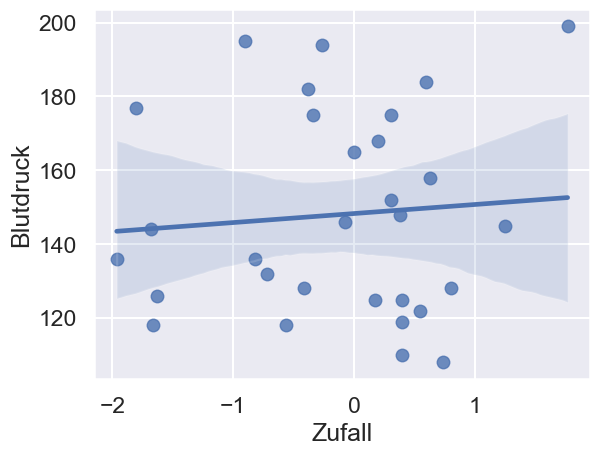

In [33]:
sns.regplot(df, x='Zufall', y='Blutdruck');